In [4]:
import librosa

# Load in sample audio files for a wet ear and dry ear 
audio_data = '/Users/robinyang/Desktop/voice3/full/18.wav'
audio_data2 = '/Users/robinyang/Desktop/voice3/full/9.wav'
audio_data3 = '/Users/robinyang/Desktop/voice3/dry/14.wav'
audio_data4 = '/Users/robinyang/Desktop/voice3/dry/20.wav'


# Sampling rate of 44.1 khz
sr = 44100

x1 = librosa.load(audio_data, sr=sr)
x1 = x1[0]

x2 = librosa.load(audio_data2, sr=sr)
x2 = x2[0]

y1 = librosa.load(audio_data3, sr=sr)
y1 = y1[0]

y2 = librosa.load(audio_data4, sr=sr)
y2= y2[0]

# Window for 2.5 seconds
x1 = x1[0:110250]
x2 = x2[0:110250]
y1 = y1[0:110250]
y2 = y2[0:110250]

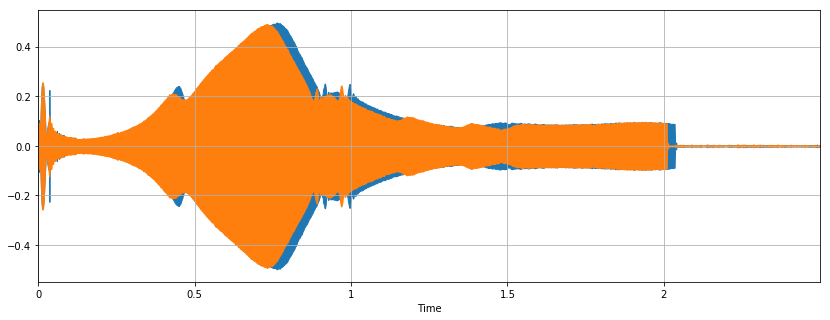

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# Plot Waveforms

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x1, sr=sr)
librosa.display.waveplot(y2, sr=sr)
plt.grid()

## FFT

In [17]:
from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
import scipy.fftpack
import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt
from scipy.signal import savgol_filter


# Plot the FFT of a signal, with Frequency as X-axis
def fftPlot(signal, fs_rate):
    print ("Frequency sampling", fs_rate)
    l_audio = len(signal.shape)
    print ("Channels", l_audio)
    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    print ("Complete Samplings N", N)
    secs = N / float(fs_rate)
    print ("secs", secs)
    Ts = 1.0/fs_rate # sampling interval in time
    print ("Timestep between samples Ts", Ts)
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range
    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(N//2)] # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    plt.figure(figsize=(14, 5))
    plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Count single-sided')
    plt.xlim(0, 11000)
    plt.ylim(0, 175)
    plt.grid()
    plt.show()
    
# Find FFT -> Filter Signal -> Find Peaks -> Plot 2 - 2.4 kHz range
def fftPlotPeaks(signal, fs_rate):
    print ("Frequency sampling", fs_rate)
    l_audio = len(signal.shape)
    print ("Channels", l_audio)
    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    print ("Complete Samplings N", N)
    secs = N / float(fs_rate)
    print ("secs", secs)
    Ts = 1.0/fs_rate # sampling interval in time
    print ("Timestep between samples Ts", Ts)
    
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range
    yhat = savgol_filter(FFT_side, 301, 3) # window size 51, polynomial order 3
    
    plt.figure(figsize=(14, 5))
    peaks, _ = find_peaks(yhat, distance = 300)
    plt.plot(peaks, yhat[peaks], "x")
    plt.plot(abs(yhat), "b") # plotting the positive fft spectrum
    plt.ylabel('Count single-sided')
    plt.ylim(40, 80)
    plt.xlim(5000, 6500)
#     plt.xlim(10000, 15000)
#     plt.ylim(40, 120)
    plt.grid()
    plt.show()

# Plot Filtered FFT for smoother signal
def fftPlotSmooth(signal, fs_rate):
    print ("Frequency sampling", fs_rate)
    l_audio = len(signal.shape)
    print ("Channels", l_audio)
    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    print ("Complete Samplings N", N)
    secs = N / float(fs_rate)
    print ("secs", secs)
    Ts = 1.0/fs_rate # sampling interval in time
    print ("Timestep between samples Ts", Ts)
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    
    
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range
    freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
    fft_freqs = np.array(freqs)
    freqs_side = freqs[range(N//2)] # one side frequency range
    fft_freqs_side = np.array(freqs_side)
    yhat = savgol_filter(abs(FFT_side), 301, 3) # window size 51, polynomial order 3
    
    plt.figure(figsize=(14, 5))
    plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
    plt.plot(freqs_side, yhat, "r")
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Count single-sided')
    
    print(FFT_side.shape)
    print(freqs_side.shape)
    
    plt.xlim(0, 11000)
    plt.ylim(0, 175)
    plt.grid()
    plt.show()
    
# Compare the FFT of two signals
def fftPlotCompare(signal1, signal2, fs_rate):
    N = signal1.shape[0]
    print ("Complete Samplings N", N)
    secs = N / float(fs_rate)
    print ("secs", secs)
    Ts = 1.0/fs_rate # sampling interval in time
    print ("Timestep between samples Ts", Ts)
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    
    FFT1 = abs(scipy.fft.fft(signal1))
    FFT_side1 = FFT1[range(N//2)] # one side FFT range
    freqs1 = scipy.fftpack.fftfreq(signal1.size, t[1]-t[0])
    fft_freqs1 = np.array(freqs1)
    freqs_side1 = freqs1[range(N//2)] # one side frequency range
    fft_freqs_side1 = np.array(freqs_side1)

    
    FFT2 = abs(scipy.fft.fft(signal2))
    FFT_side2 = FFT2[range(N//2)] # one side FFT range
    freqs2 = scipy.fftpack.fftfreq(signal2.size, t[1]-t[0])
    fft_freqs2 = np.array(freqs2)
    freqs_side2 = freqs2[range(N//2)] # one side frequency range
    fft_freqs_side2 = np.array(freqs_side2)
    
    plt.figure(figsize=(14, 5))
    plt.plot(freqs_side2, abs(FFT_side2), "b") # plotting signal 2 blue
    plt.plot(freqs_side1, abs(FFT_side1), "r") # plotting signal 1 red
    
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Count single-sided')
    plt.xlim(0, 11000)
    plt.ylim(0, 175)
    plt.grid()
    plt.show()
    
    
# fs_rate, signal = wavfile.read("/Users/robinyang/Desktop/voice3/dry/1.wav")
# print ("Frequency sampling", fs_rate)
# l_audio = len(signal.shape)
# print ("Channels", l_audio)
# if l_audio == 2:
#     signal = signal.sum(axis=1) / 2
# N = signal.shape[0]
# print ("Complete Samplings N", N)
# secs = N / float(fs_rate)
# print ("secs", secs)
# Ts = 1.0/fs_rate # sampling interval in time
# print ("Timestep between samples Ts", Ts)
# t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
# FFT = abs(scipy.fft.fft(signal))
# FFT_side = FFT[range(N//2)] # one side FFT range
# freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
# fft_freqs = np.array(freqs)
# freqs_side = freqs[range(N//2)] # one side frequency range
# fft_freqs_side = np.array(freqs_side)
# plt.subplot(311)
# p1 = plt.plot(t, signal, "g") # plotting the signal
# plt.xlabel('Time')
# plt.ylabel('Amplitude')
# plt.subplot(312)
# p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Count dbl-sided')
# plt.subplot(313)
# p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Count single-sided')
# plt.show()

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


/Users/robinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


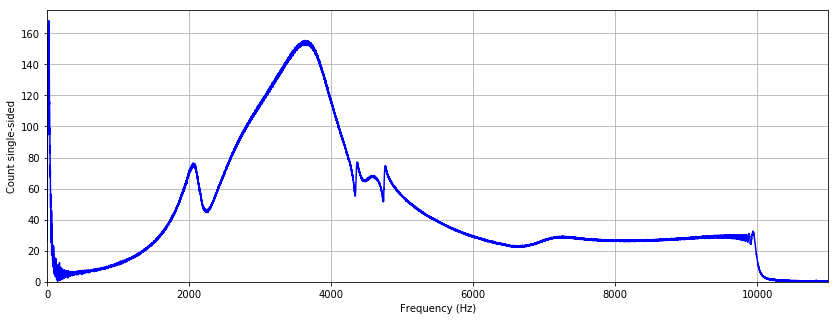

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


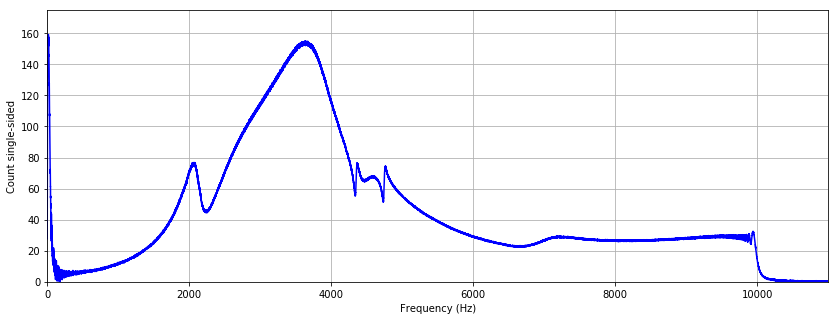

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


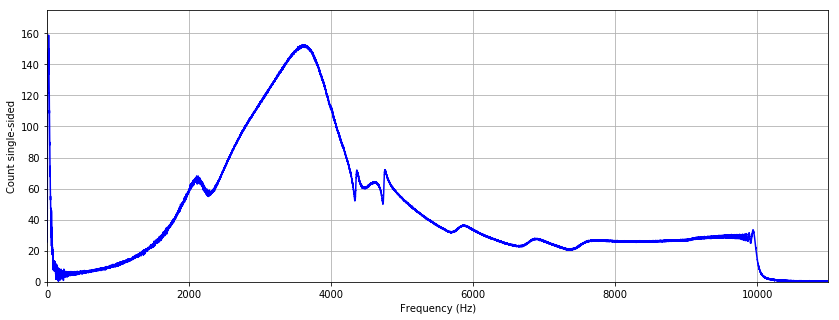

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


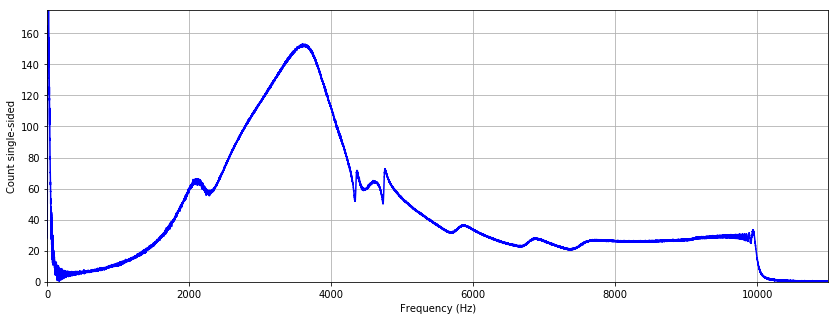

In [6]:
# Plot four samples (x1, 2 are fluid) (y1, 2 are non-fluid)
fftPlot(x1, 44100)
fftPlot(x2, 44100)
fftPlot(y1, 44100)
fftPlot(y2, 44100)

Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


/Users/robinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


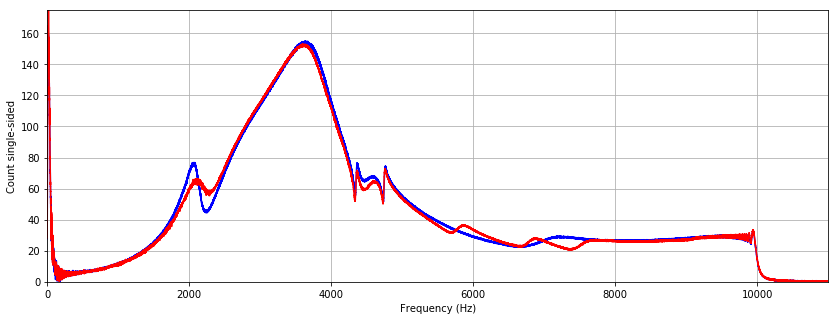

In [10]:
# Overlay two samples
fftPlotCompare(y2, x2, 44100)

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05
(55125,)
(55125,)


/Users/robinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:84: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


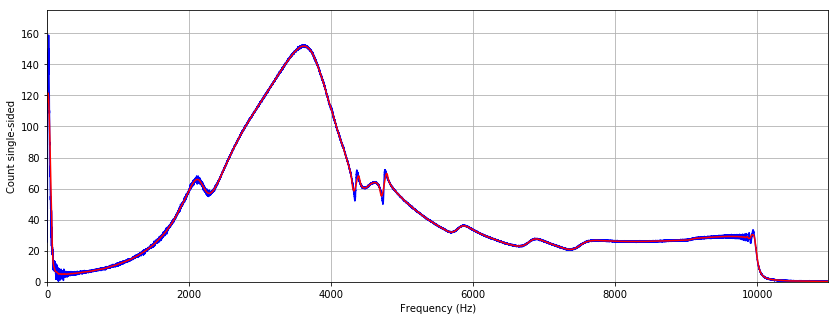

In [11]:
# Plot a smoothed signal over original signal
fftPlotSmooth(y1, 44100)

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


/Users/robinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


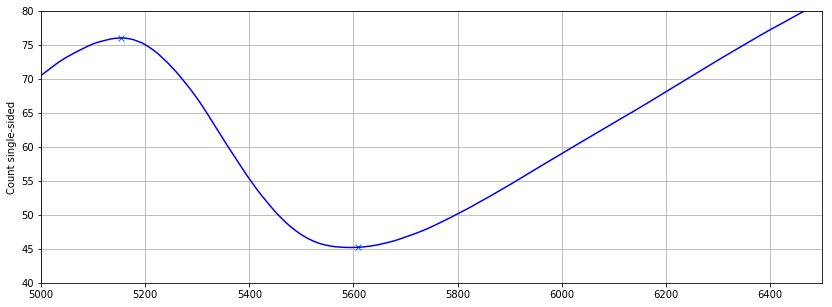

In [12]:
# Verify Peak detection in frequency window
fftPlotPeaks(x2, 44100)

## Pull Features

In [14]:
# Process data and pull basic features
def preProcess(signal, fs_rate, localMins, localMaxs, minMaxs):
    N = signal.shape[0]
    secs = N / float(fs_rate)
    Ts = 1.0/fs_rate # sampling interval in time
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    
    # Get the FFT
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range

    # Smooth out the FFT
    yhat = savgol_filter(abs(FFT_side), 301, 2) # window size 51, polynomial order 3

    # Section off 2 - 2.4 kHz
    yhat = yhat[5000:6000]
    
    # Find Peaks
    peaks, _ = find_peaks(yhat, distance = 300)
    
    # Add features
    yPeaks = yhat[peaks]
    lMax = yhat[peaks][len(yPeaks) - 2]
    localMaxs.append(lMax)
    lMin = yhat[peaks][len(yPeaks) - 1]
    localMins.append(lMin)
    minMaxs.append(lMax - lMin)
    
#     # Plot
#     plt.figure(figsize=(14, 5))
#     plt.plot(peaks, yhat[peaks], "x")
#     plt.plot(yhat, "r")
#     plt.xlabel('Index')
#     plt.ylabel('Count single-sided')
    

In [15]:
# Process data and plot afterwards
def preProcessPlot(signal, fs_rate):
    N = signal.shape[0]
    secs = N / float(fs_rate)
    Ts = 1.0/fs_rate # sampling interval in time
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    
    # Get the FFT
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range

    # Smooth out the FFT
    yhat = savgol_filter(abs(FFT_side), 301, 3) # window size 51, polynomial order 3

    # Section off 2 - 2.4 kHz
    yhat = yhat[5000:6000]
#     yhat = savgol_filter(yhat, 51, 3)
    
    # Find Peaks
    peaks, _ = find_peaks(yhat, distance = 300)
    
    # Add features
    print(yhat[peaks])
    
#     # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(peaks, yhat[peaks], "x")
    plt.plot(yhat, "r")
    plt.xlabel('Index')
    plt.ylabel('Count single-sided')

/Users/robinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


[75.15244  45.513317]
[65.91422  57.043056]


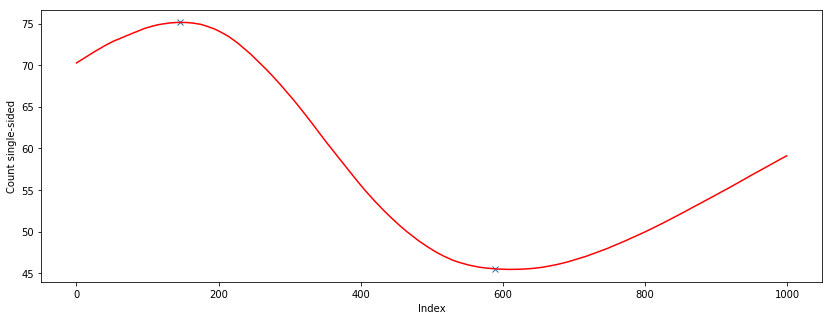

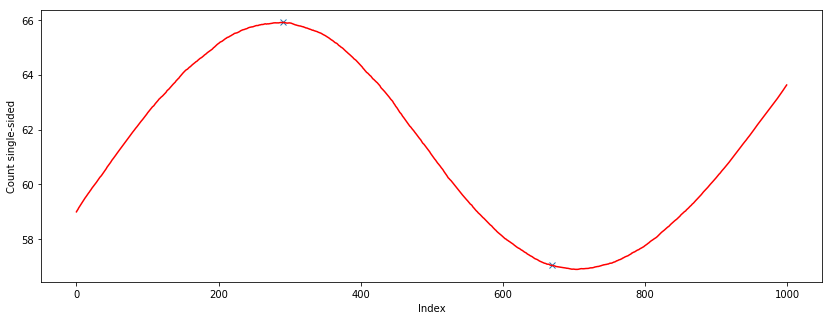

In [16]:
# Verify peak detection. Algorithm is not perfect yet but works well enough for now
preProcessPlot(x1, 44100)
preProcessPlot(y1, 44100)

## ML

In [128]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [45]:
wetDry = ""
signalTable = []
labelTable = []
localMins = []
localMaxs = []
minMaxs = []

# Go through audio files and generate labeled dataframe
for label in range(1, 3):
    if label == 1:
        wetDry = "dry"
    else:
        wetDry = "full"
    for fileNum in range(1, 26):
        signalPath = '/Users/robinyang/Desktop/voice3/' + wetDry + '/' +  str(fileNum) + '.wav'
        signal = librosa.load(signalPath, sr=44100)
        signalTable.append(signal[0][0:110250])
        labelTable.append(wetDry)

# Process the audio files and place features into dataframe
for audio in signalTable:
    preProcess(audio, 44100, localMins, localMaxs, minMaxs)
    
    
    
d = {'Signals': signalTable, 'Labels': labelTable, 'localMins': localMins, 'localMaxs': localMaxs, 'minMaxs': minMaxs}
df = pd.DataFrame(data=d)


In [46]:
# Generate headers for CSV file
header = 'fileIndex localMaxs localMins minMaxs'
header += ' label'
header = header.split()

In [49]:
# Create CSV file for features
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
labels = 'dry full'.split()
for ind in range(0, len(df.index)):
    to_append = f'{ind} {df.loc[ind].localMaxs} {df.loc[ind].localMins} {df.loc[ind].minMaxs} {df.loc[ind].Labels}'
    file = open('dataset.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [51]:
# Read CSV of features
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['fileIndex'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [52]:
# Convolutional Neural Net Model (Although I believe most models will work with similar accuracy)
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [53]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
40/40 [==============================] - 0s 3ms/step - loss: 2.2830 - accuracy: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 45us/step - loss: 2.1737 - accuracy: 0.0750
Epoch 3/100
40/40 [==============================] - 0s 44us/step - loss: 2.0701 - accuracy: 0.4750
Epoch 4/100
40/40 [==============================] - 0s 41us/step - loss: 1.9678 - accuracy: 1.0000
Epoch 5/100
40/40 [==============================] - 0s 49us/step - loss: 1.8719 - accuracy: 1.0000
Epoch 6/100
40/40 [==============================] - 0s 42us/step - loss: 1.7773 - accuracy: 1.0000
Epoch 7/100
40/40 [==============================] - 0s 48us/step - loss: 1.6797 - accuracy: 1.0000
Epoch 8/100
40/40 [==============================] - 0s 40us/step - loss: 1.5812 - accuracy: 1.0000
Epoch 9/100
40/40 [==============================] - 0s 46us/step - loss: 1.4796 - accuracy: 1.0000
Epoch 10/100
40/40 [==============================] - 0s 42us/step - loss: 1.3737 - accuracy: 1.0

Epoch 81/100
40/40 [==============================] - 0s 51us/step - loss: 2.0774e-04 - accuracy: 1.0000
Epoch 82/100
40/40 [==============================] - 0s 42us/step - loss: 2.0534e-04 - accuracy: 1.0000
Epoch 83/100
40/40 [==============================] - 0s 61us/step - loss: 2.0302e-04 - accuracy: 1.0000
Epoch 84/100
40/40 [==============================] - 0s 39us/step - loss: 2.0079e-04 - accuracy: 1.0000
Epoch 85/100
40/40 [==============================] - 0s 47us/step - loss: 1.9864e-04 - accuracy: 1.0000
Epoch 86/100
40/40 [==============================] - 0s 44us/step - loss: 1.9654e-04 - accuracy: 1.0000
Epoch 87/100
40/40 [==============================] - 0s 45us/step - loss: 1.9452e-04 - accuracy: 1.0000
Epoch 88/100
40/40 [==============================] - 0s 43us/step - loss: 1.9257e-04 - accuracy: 1.0000
Epoch 89/100
40/40 [==============================] - 0s 38us/step - loss: 1.9065e-04 - accuracy: 1.0000
Epoch 90/100
40/40 [==============================] - 0

In [54]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [ ]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))


for file in df.SignalPaths:
    audio = librosa.load(audio_data, sr=44100)
    audio = audio[0]
    audio = audio[450000:600000]
    plt.specgram(audio, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'{file[:-3].replace(".", "")}.png')
    plt.clf()

## My Ear vs. Verification Tube

In [25]:
import librosa

# Load in sample audio files for a wet ear and dry ear 
audio_data = '/Users/robinyang/Desktop/voice3/jamie/3.wav'
audio_data2 = '/Users/robinyang/Desktop/voice3/karen/9.wav'
audio_data3 = '/Users/robinyang/Desktop/voice3/tube/4.wav'
audio_data4 = '/Users/robinyang/Desktop/voice3/tube/11.wav'


# Sampling rate of 44.1 khz
sr = 44100

x1 = librosa.load(audio_data, sr=sr)
x1 = x1[0]

x2 = librosa.load(audio_data2, sr=sr)
x2 = x2[0]

y1 = librosa.load(audio_data3, sr=sr)
y1 = y1[0]

y2 = librosa.load(audio_data4, sr=sr)
y2= y2[0]

# Window for 2.5 seconds
x1 = x1[0:110250]
x2 = x2[0:110250]
y1 = y1[0:110250]
y2 = y2[0:110250]

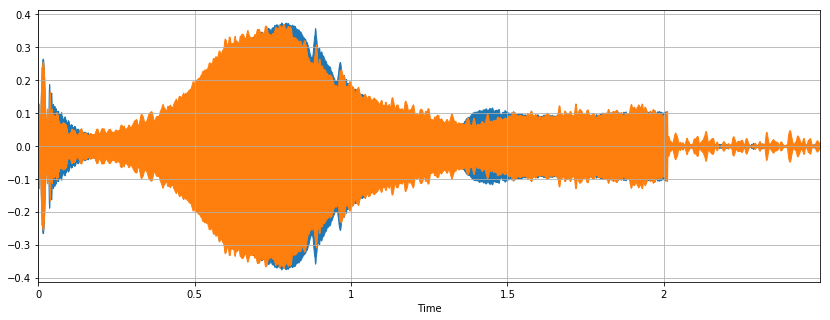

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

# Plot Waveforms

plt.figure(figsize=(14, 5))
librosa.display.waveplot(y1, sr=sr)
librosa.display.waveplot(x2, sr=sr)
# librosa.display.waveplot(y2, sr=sr)
plt.grid()

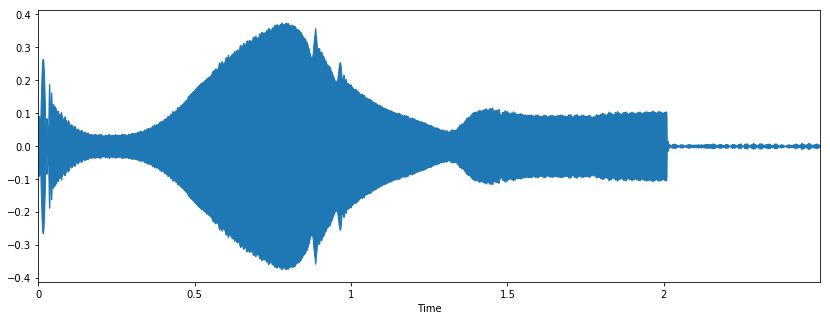

In [10]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(y1, sr=sr)

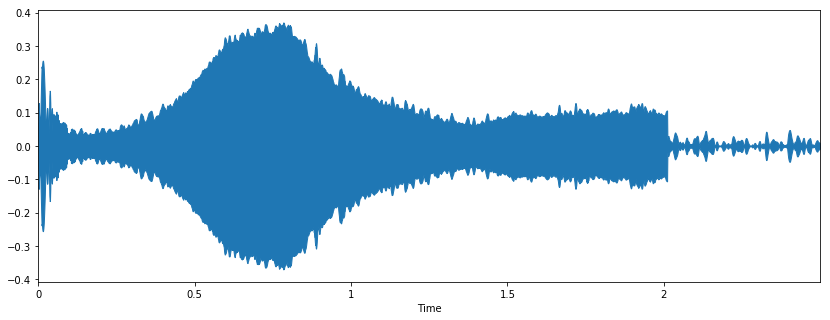

In [9]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x2, sr=sr)

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


/Users/robinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


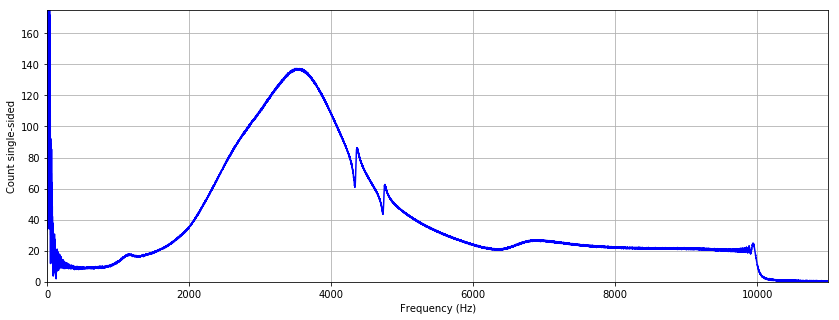

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


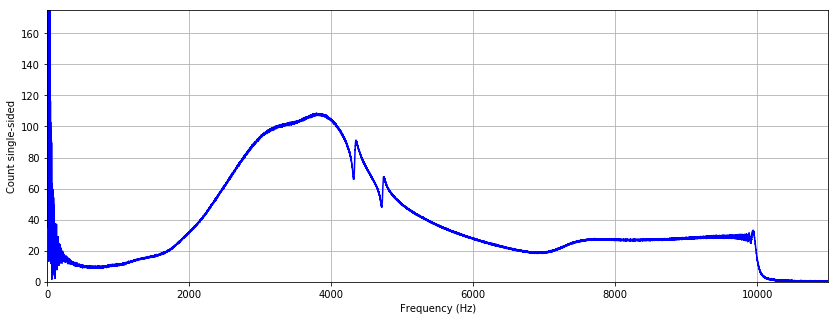

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


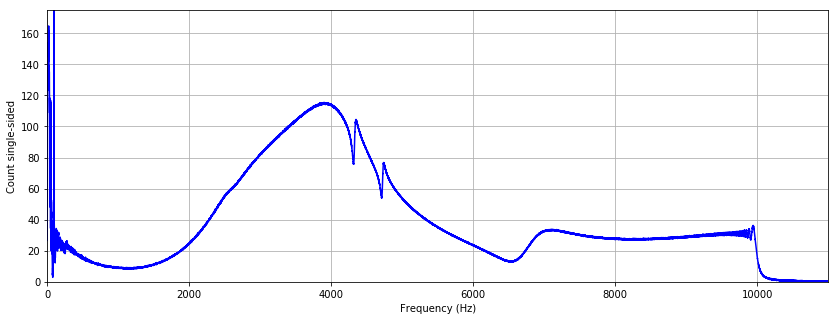

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


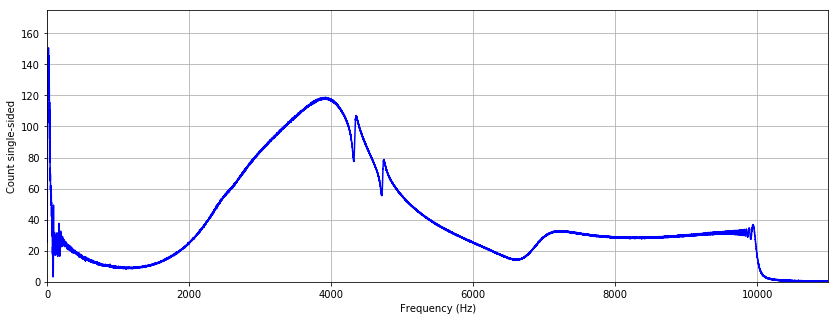

In [5]:
# Plot four samples 
fftPlot(x1, 44100)
fftPlot(x2, 44100)
fftPlot(y1, 44100)
fftPlot(y2, 44100)

Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


/Users/robinyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:117: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead


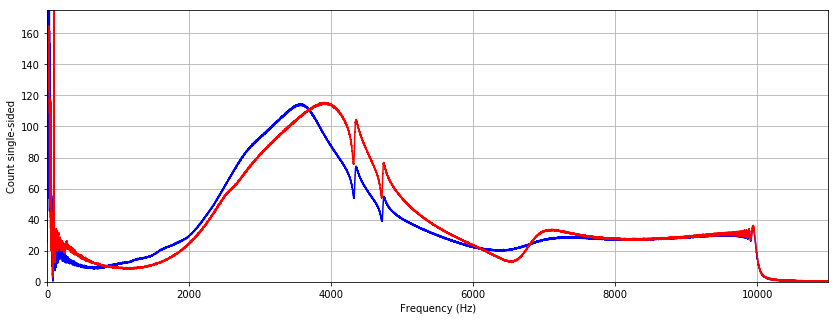

In [27]:
# Overlay two samples
fftPlotCompare(y1, x2, 44100)

In [144]:
import numpy as np
from scipy.signal import argrelextrema
# Find FFT -> Filter Signal -> Find Peaks -> Plot 2 - 2.4 kHz range
def fftPlotPeaksReal(signal, fs_rate):
    print ("Frequency sampling", fs_rate)
    l_audio = len(signal.shape)
    print ("Channels", l_audio)
    if l_audio == 2:
        signal = signal.sum(axis=1) / 2
    N = signal.shape[0]
    print ("Complete Samplings N", N)
    secs = N / float(fs_rate)
    print ("secs", secs)
    Ts = 1.0/fs_rate # sampling interval in time
    print ("Timestep between samples Ts", Ts)
    
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range
    plt.figure(figsize=(14, 5))
    
    inv_data = 1/FFT_side
    max_peaks, _ = find_peaks(FFT_side, prominence = 10)
    min_peaks, _ = find_peaks(inv_data, prominence = 0.001)

    plt.plot(min_peaks, FFT_side[min_peaks], "o")
    plt.plot(max_peaks, FFT_side[max_peaks], "x")
    plt.plot(abs(FFT_side), "b") # plotting the positive fft spectrum
    plt.ylabel('Count single-sided')
    plt.xlim(10000, 13000)
    plt.ylim(0, 120)
    plt.grid()
    plt.show()

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


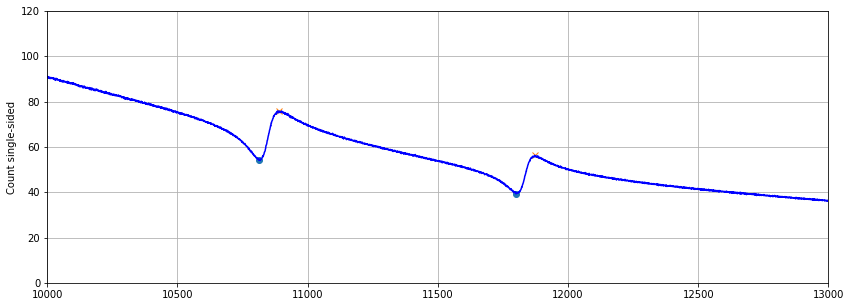

In [145]:
fftPlotPeaksReal(x1, 44100)

Frequency sampling 44100
Channels 1
Complete Samplings N 110250
secs 2.5
Timestep between samples Ts 2.2675736961451248e-05


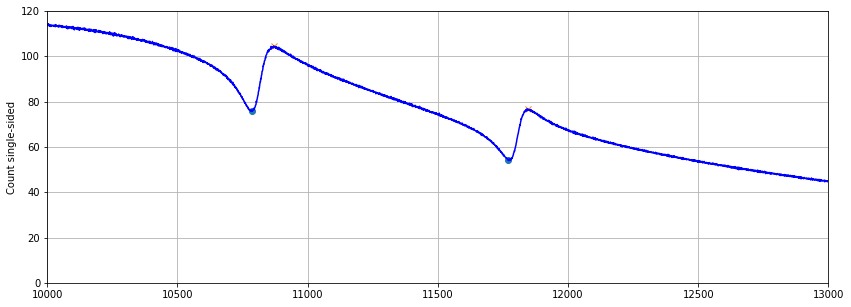

In [146]:
fftPlotPeaksReal(y1, 44100)

In [157]:
def preProcessReal(signal, fs_rate, localMin1, localMax1, minMax1, localMin2, localMax2, minMax2):
    N = signal.shape[0]
    secs = N / float(fs_rate)
    Ts = 1.0/fs_rate # sampling interval in time
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    
    # Get the FFT
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range

    # Section off 2 - 2.4 kHz
    FFT_side = FFT_side[10000:13000]
    
    # Find Peaks
    inv_data = 1/FFT_side
    max_peaks, _ = find_peaks(FFT_side, prominence = 10)
    min_peaks, _ = find_peaks(inv_data, prominence = 0.001)
    
    # Add features
#     numMaxPeaks = len(FFT_side[max_peaks])
#     numMinPeaks = len(FFT_side[min_peaks])
    
    localMin1.append(FFT_side[min_peaks][0])
    localMin2.append(FFT_side[min_peaks][1])
    localMax1.append(FFT_side[max_peaks][0])
    localMax2.append(FFT_side[max_peaks][1])
    
    minMax1.append(FFT_side[max_peaks][0] - FFT_side[min_peaks][0])
    minMax2.append(FFT_side[max_peaks][1] - FFT_side[min_peaks][1])

# Process data and plot afterwards
def preProcessPlotReal(signal, fs_rate):
    N = signal.shape[0]
    secs = N / float(fs_rate)
    Ts = 1.0/fs_rate # sampling interval in time
    t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
    
    # Get the FFT
    FFT = abs(scipy.fft.fft(signal))
    FFT_side = FFT[range(N//2)] # one side FFT range

    # Section off 2 - 2.4 kHz
    FFT_side = FFT_side[10000:13000]

    # Find Peaks
    inv_data = 1/FFT_side
    max_peaks, _ = find_peaks(FFT_side, prominence = 10)
    min_peaks, _ = find_peaks(inv_data, prominence = 0.001)
    
    # Add features

    
#     # Plot
    plt.figure(figsize=(14, 5))
    plt.plot(min_peaks, FFT_side[min_peaks], "o")
    plt.plot(max_peaks, FFT_side[max_peaks], "x")
    plt.plot(FFT_side, "r")
    plt.xlabel('Index')
    plt.ylabel('Count single-sided')

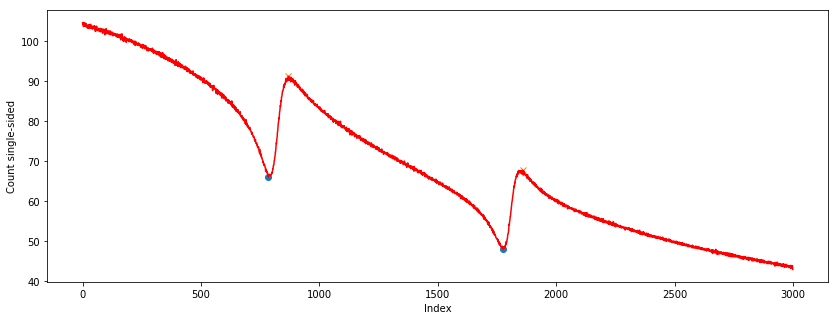

In [148]:
preProcessPlotReal(x2, 44100)

In [158]:
wetDry = ""
signalTable = []
labelTable = []
localMin1 = []
localMax1 = []
minMax1 = []
localMin2 = []
localMax2 = []
minMax2 = []

# Go through audio files and generate labeled dataframe
for label in range(1, 3):
    if label == 1:
        wetDry = "ear"
    else:
        wetDry = "tube"
    for fileNum in range(1, 26):
        signalPath = '/Users/robinyang/Desktop/voice3/' + wetDry + '/' +  str(fileNum) + '.wav'
        signal = librosa.load(signalPath, sr=44100)
        signalTable.append(signal[0][0:110250])
        labelTable.append(wetDry)

# Process the audio files and place features into dataframe
for audio in signalTable:
    preProcessReal(audio, 44100, localMin1, localMax1, minMax1, localMin2, localMax2, minMax2)
    
    
    
d = {'Signals': signalTable, 'Labels': labelTable, 'localMin1': localMin1, 'localMax1': localMax1, 'minMax1': minMax1, 'localMin2': localMin2, 'localMax2': localMax2, 'minMax2': minMax2}
df = pd.DataFrame(data=d)
df


,Signals,Labels,localMin1,localMax1,minMax1,localMin2,localMax2,minMax2
0,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,68.698517,95.964203,27.265686,52.197884,74.284843,22.086960
1,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,64.780769,89.139389,24.358620,47.904419,67.831253,19.926834
2,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,64.484703,89.202194,24.717491,48.040520,67.555939,19.515419
3,"[0.0, 0.0, 0.0, 0.0, 6.1035156e-05, 0.00057983...",ear,64.675560,88.966301,24.290741,47.642277,67.521637,19.879360
4,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00057983...",ear,64.580872,88.996284,24.415413,47.890881,67.465286,19.574406
5,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,65.868896,92.607849,26.738953,47.651989,68.006607,20.354618
6,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00064086...",ear,65.739662,91.843445,26.103783,47.308853,67.605995,20.297142
7,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00057983...",ear,65.881966,92.074402,26.192436,47.487740,67.595169,20.107430
8,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00057983...",ear,66.506882,92.247406,25.740524,48.292362,68.693329,20.400967
9,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00064086...",ear,66.126587,92.340637,26.214050,48.265213,68.560417,20.295204


In [159]:
# Generate headers for CSV file
header = 'fileIndex localMin1 localMax1 minMax1 localMin2, localMax2 minMax2'
header += ' label'
header = header.split()

In [160]:
# Create CSV file for features
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
labels = 'ear tube'.split()
for ind in range(0, len(df.index)):
    to_append = f'{ind} {df.loc[ind].localMin1} {df.loc[ind].localMax1} {df.loc[ind].minMax1} {df.loc[ind].localMin2} {df.loc[ind].localMax2} {df.loc[ind].minMax2} {df.loc[ind].Labels}'
    file = open('dataset.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [161]:
# Read CSV of features
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['fileIndex'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [162]:
# Convolutional Neural Net Model (Although I believe most models will work with similar accuracy)
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [163]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
40/40 [==============================] - 0s 2ms/step - loss: 2.4817 - accuracy: 0.0000e+00
Epoch 2/100
40/40 [==============================] - 0s 40us/step - loss: 2.3290 - accuracy: 0.0000e+00
Epoch 3/100
40/40 [==============================] - 0s 50us/step - loss: 2.1992 - accuracy: 0.5250
Epoch 4/100
40/40 [==============================] - 0s 45us/step - loss: 2.0926 - accuracy: 0.5250
Epoch 5/100
40/40 [==============================] - 0s 37us/step - loss: 2.0003 - accuracy: 0.9000
Epoch 6/100
40/40 [==============================] - 0s 32us/step - loss: 1.9084 - accuracy: 1.0000
Epoch 7/100
40/40 [==============================] - 0s 36us/step - loss: 1.8201 - accuracy: 1.0000
Epoch 8/100
40/40 [==============================] - 0s 37us/step - loss: 1.7311 - accuracy: 1.0000
Epoch 9/100
40/40 [==============================] - 0s 38us/step - loss: 1.6390 - accuracy: 1.0000
Epoch 10/100
40/40 [==============================] - 0s 40us/step - loss: 1.5422 - accuracy:

Epoch 83/100
40/40 [==============================] - 0s 36us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 84/100
40/40 [==============================] - 0s 36us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 85/100
40/40 [==============================] - 0s 36us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 86/100
40/40 [==============================] - 0s 36us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 87/100
40/40 [==============================] - 0s 35us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 88/100
40/40 [==============================] - 0s 38us/step - loss: 9.8196e-04 - accuracy: 1.0000
Epoch 89/100
40/40 [==============================] - 0s 36us/step - loss: 9.5369e-04 - accuracy: 1.0000
Epoch 90/100
40/40 [==============================] - 0s 39us/step - loss: 9.2671e-04 - accuracy: 1.0000
Epoch 91/100
40/40 [==============================] - 0s 45us/step - loss: 9.0100e-04 - accuracy: 1.0000
Epoch 92/100
40/40 [==============================] - 0s 38us/step - loss: 

In [164]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 100.00%
Testing Accuracy: 100.00%


In [166]:
wetDry = ""
signalTable = []
labelTable = []
localMin1 = []
localMax1 = []
minMax1 = []
localMin2 = []
localMax2 = []
minMax2 = []

# Go through audio files and generate labeled dataframe
for label in range(1, 3):
    if label == 1:
        wetDry = "karen"
    else:
        wetDry = "tube"
    for fileNum in range(1, 26):
        signalPath = '/Users/robinyang/Desktop/voice3/' + wetDry + '/' +  str(fileNum) + '.wav'
        signal = librosa.load(signalPath, sr=44100)
        signalTable.append(signal[0][0:110250])
        if label == 1:
            wetDry = 'ear'
        labelTable.append(wetDry)

# Process the audio files and place features into dataframe
for audio in signalTable:
    preProcessReal(audio, 44100, localMin1, localMax1, minMax1, localMin2, localMax2, minMax2)
    
    
    
d2 = {'Signals': signalTable, 'Labels': labelTable, 'localMin1': localMin1, 'localMax1': localMax1, 'minMax1': minMax1, 'localMin2': localMin2, 'localMax2': localMax2, 'minMax2': minMax2}
df2 = pd.DataFrame(data=d2)
df2

,Signals,Labels,localMin1,localMax1,minMax1,localMin2,localMax2,minMax2
0,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,53.584934,75.213722,21.628788,39.003193,55.828556,16.825363
1,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,64.780769,89.139389,24.358620,47.904419,67.831253,19.926834
2,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,64.484703,89.202194,24.717491,48.040520,67.555939,19.515419
3,"[0.0, 0.0, 0.0, 0.0, 6.1035156e-05, 0.00057983...",ear,64.675560,88.966301,24.290741,47.642277,67.521637,19.879360
4,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00057983...",ear,64.580872,88.996284,24.415413,47.890881,67.465286,19.574406
5,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00061035...",ear,65.868896,92.607849,26.738953,47.651989,68.006607,20.354618
6,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00064086...",ear,65.739662,91.843445,26.103783,47.308853,67.605995,20.297142
7,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00057983...",ear,65.881966,92.074402,26.192436,47.487740,67.595169,20.107430
8,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00057983...",ear,66.506882,92.247406,25.740524,48.292362,68.693329,20.400967
9,"[0.0, 0.0, 0.0, 0.0, 9.1552734e-05, 0.00064086...",ear,66.126587,92.340637,26.214050,48.265213,68.560417,20.295204


In [167]:
# Generate headers for CSV file
header = 'fileIndex localMin1 localMax1 minMax1 localMin2, localMax2 minMax2'
header += ' label'
header = header.split()

In [168]:
# Create CSV file for features
file = open('dataset2.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
labels = 'ear tube'.split()
for ind in range(0, len(df2.index)):
    to_append = f'{ind} {df2.loc[ind].localMin1} {df2.loc[ind].localMax1} {df2.loc[ind].minMax1} {df2.loc[ind].localMin2} {df2.loc[ind].localMax2} {df2.loc[ind].minMax2} {df2.loc[ind].Labels}'
    file = open('dataset2.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

In [169]:
# Read CSV of features
data = pd.read_csv('dataset2.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['fileIndex'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set

In [170]:
score = model.evaluate(X, y, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 100.00%


# Everything below is just for messing around

## Spectrographs

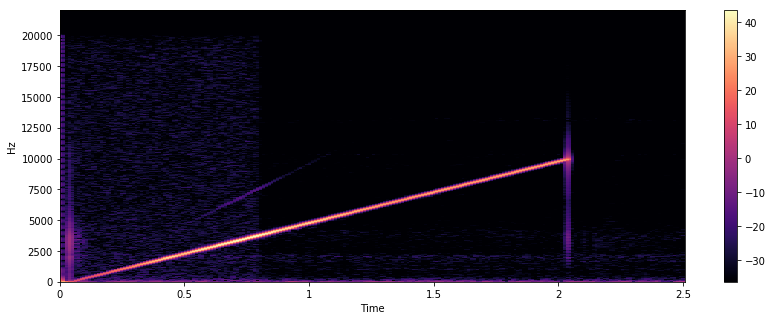

In [17]:
X = librosa.stft(x1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
# plt.ylim(0, 2000)

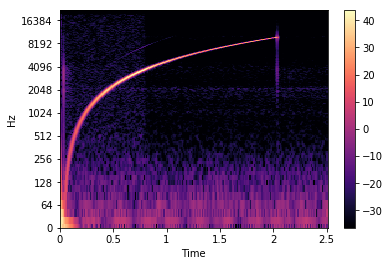

In [18]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

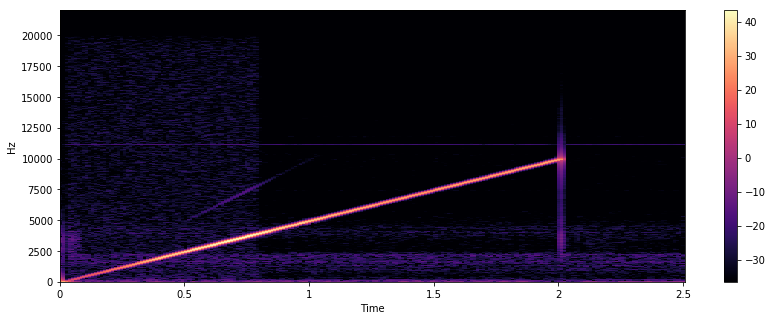

In [19]:
X = librosa.stft(y1)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
# plt.ylim(0, 2000)

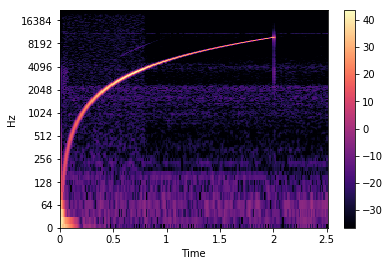

In [20]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

## Spectral Centroids

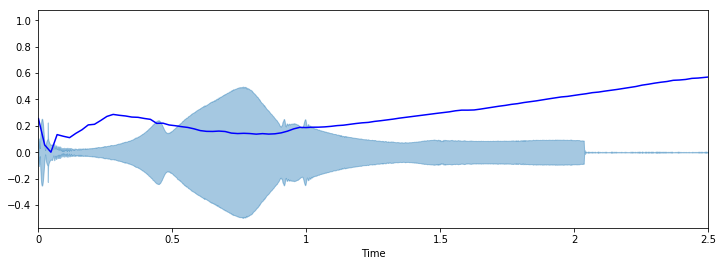

In [21]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x1, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x1, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

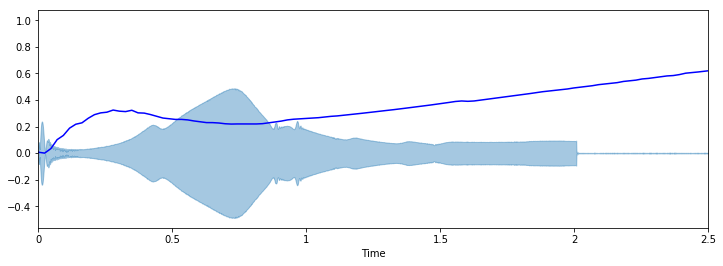

In [22]:
spectral_centroids = librosa.feature.spectral_centroid(y1, sr=sr)[0]
spectral_centroids.shape
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveplot(y1, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

## Spectral Rolloff

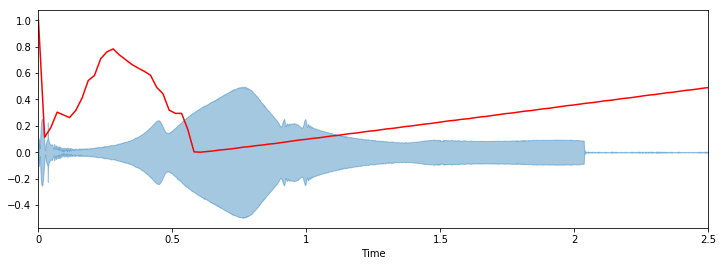

In [23]:
spectral_rolloff = librosa.feature.spectral_rolloff(x1+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x1, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

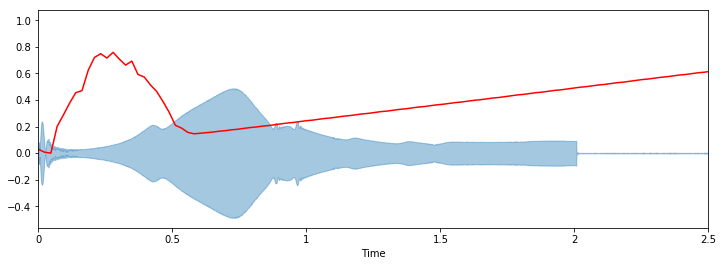

In [24]:
spectral_rolloff = librosa.feature.spectral_rolloff(y1+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(y1, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## Spectral Bandwidth

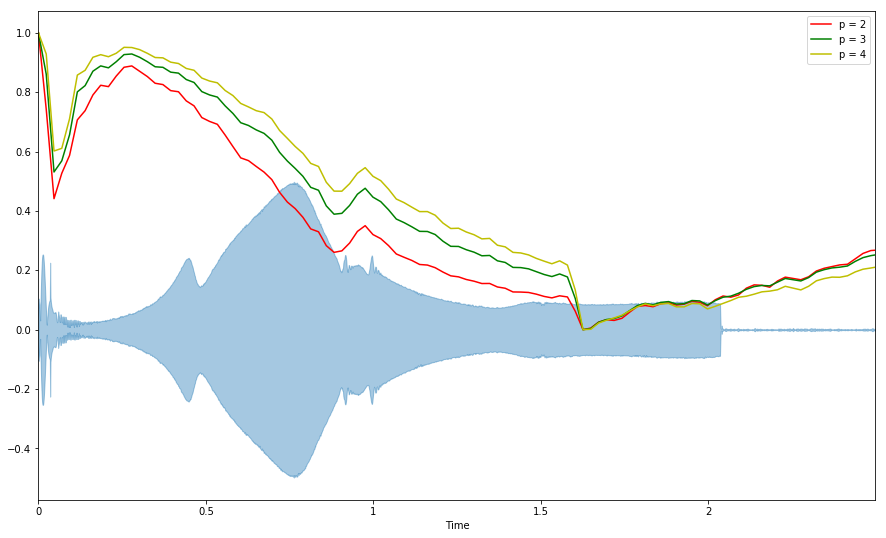

In [25]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x1+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x1+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x1+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x1, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

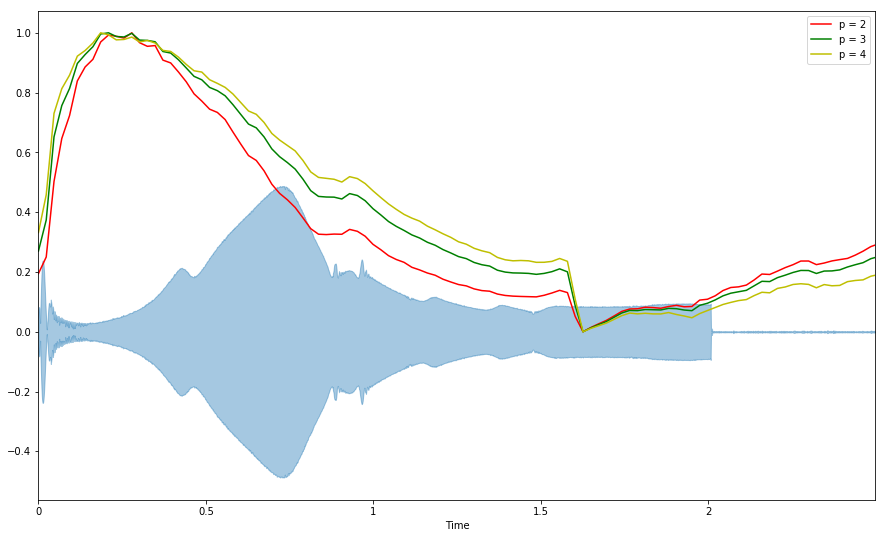

In [26]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y1+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y1+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y1+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(y1, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

## ML

In [119]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from PIL import Image
import pathlib
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras import layers
import keras
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [121]:
wetDry = ""
signalTable = []
labelTable = []
for label in range(1, 3):
    if label == 1:
        wetDry = "dry"
    else:
        wetDry = "full"
    for fileNum in range(1, 26):
        signalPath = '/Users/robinyang/Desktop/voice3/' + wetDry + '/' +  str(fileNum) + '.wav'
        signalTable.append(signalPath)
        labelTable.append(wetDry)



In [122]:
d = {'SignalPaths': signalTable, 'Labels': labelTable}
df = pd.DataFrame(data=d)
df

,SignalPaths,Labels
0,/Users/robinyang/Desktop/voice3/dry/1.wav,dry
1,/Users/robinyang/Desktop/voice3/dry/2.wav,dry
2,/Users/robinyang/Desktop/voice3/dry/3.wav,dry
3,/Users/robinyang/Desktop/voice3/dry/4.wav,dry
4,/Users/robinyang/Desktop/voice3/dry/5.wav,dry
5,/Users/robinyang/Desktop/voice3/dry/6.wav,dry
6,/Users/robinyang/Desktop/voice3/dry/7.wav,dry
7,/Users/robinyang/Desktop/voice3/dry/8.wav,dry
8,/Users/robinyang/Desktop/voice3/dry/9.wav,dry
9,/Users/robinyang/Desktop/voice3/dry/10.wav,dry


In [110]:
cmap = plt.get_cmap('inferno')
plt.figure(figsize=(8,8))
for file in df.SignalPaths:
    audio = librosa.load(audio_data, sr=44100)
    audio = audio[0]
    audio = audio[450000:600000]
    plt.specgram(audio, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
    plt.axis('off');
    plt.savefig(f'{file[:-3].replace(".", "")}.png')
    plt.clf()

<Figure size 576x576 with 0 Axes>

In [483]:
# header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff'
header = 'filename rmse melspectrogram'
for i in range(1, 21):
    header += f' mfcc{i}'
header += ' label'
header = header.split()

In [499]:
file = open('dataset.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
labels = 'dry full'.split()
for g in labels:
    for filename in df.SignalPaths:
        y = librosa.load(filename, sr=sr)
        y=y[0]
        y=y[450000:600000]
        
        rmse = librosa.feature.rms(y=y)
#         chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
#         spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
#         spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#         rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        melspec = librosa.feature.melspectrogram(y=y, sr=sr)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        
#         to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)}' 
        to_append = f'{filename} {np.mean(rmse)} {np.mean(melspec)}'
    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('dataset.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [500]:
data = pd.read_csv('dataset.csv')
data.head()# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)#Encoding the Labels
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)#Scaling the Feature columns
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))#Dividing data into training and Testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [501]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [502]:
classifier = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=128)

Epoch 1/100
64/64 [==============================] - 0s 2ms/step - loss: 2.1895 - accuracy: 0.2188
Epoch 2/100
64/64 [==============================] - 0s 27us/step - loss: 2.0217 - accuracy: 0.4062
Epoch 3/100
64/64 [==============================] - 0s 31us/step - loss: 1.8735 - accuracy: 0.5000
Epoch 4/100
64/64 [==============================] - 0s 31us/step - loss: 1.7407 - accuracy: 0.5000
Epoch 5/100
64/64 [==============================] - 0s 30us/step - loss: 1.6185 - accuracy: 0.5000
Epoch 6/100
64/64 [==============================] - 0s 30us/step - loss: 1.5020 - accuracy: 0.5000
Epoch 7/100
64/64 [==============================] - 0s 29us/step - loss: 1.3909 - accuracy: 0.5000
Epoch 8/100
64/64 [==============================] - 0s 29us/step - loss: 1.2846 - accuracy: 0.5000
Epoch 9/100
64/64 [==============================] - 0s 31us/step - loss: 1.1834 - accuracy: 0.5000
Epoch 10/100
64/64 [==============================] - 0s 30us/step - loss: 1.0911 - accuracy: 0.5000


Epoch 83/100
64/64 [==============================] - 0s 27us/step - loss: 0.5917 - accuracy: 0.6094
Epoch 84/100
64/64 [==============================] - 0s 29us/step - loss: 0.5906 - accuracy: 0.6094
Epoch 85/100
64/64 [==============================] - 0s 35us/step - loss: 0.5895 - accuracy: 0.6094
Epoch 86/100
64/64 [==============================] - 0s 36us/step - loss: 0.5883 - accuracy: 0.6094
Epoch 87/100
64/64 [==============================] - 0s 30us/step - loss: 0.5872 - accuracy: 0.6094
Epoch 88/100
64/64 [==============================] - 0s 47us/step - loss: 0.5861 - accuracy: 0.6094
Epoch 89/100
64/64 [==============================] - 0s 43us/step - loss: 0.5850 - accuracy: 0.6094
Epoch 90/100
64/64 [==============================] - 0s 34us/step - loss: 0.5839 - accuracy: 0.6094
Epoch 91/100
64/64 [==============================] - 0s 27us/step - loss: 0.5828 - accuracy: 0.6094
Epoch 92/100
64/64 [==============================] - 0s 30us/step - loss: 0.5817 - accurac

In [503]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: {0:.2%}".format(score[1]))
score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: {0:.2%}".format(score[1]))

Training Accuracy: 60.94%
Testing Accuracy: 6.25%
